In [9]:
import pandas as pd

def create_energy_type_dataframes(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Initialize dictionaries to store DataFrames
    energy_dfs = {
        'Wind': pd.DataFrame(),
        'Solar': pd.DataFrame(),
        'Fossil Fuels': pd.DataFrame(),
        'Battery Storage': pd.DataFrame(),
        'Biomass/Waste': pd.DataFrame(),
        'Other': pd.DataFrame()
    }
    
    # Categorize rows based on fuel type and technology type
    wind_mask = df['Fuel Type'].str.contains('Wind', na=False)
    solar_mask = df['Fuel Type'].str.contains('Solar', na=False)
    fossil_mask = df['Fuel Type'].str.contains('Fossil', na=False)
    battery_mask = df['Technology Type'].str.contains('Battery', na=False)
    biomass_waste_mask = df['Fuel Type'].str.contains('Biomass|Waste', na=False)
    
    # Populate the DataFrames
    energy_dfs['Wind'] = df[wind_mask]
    energy_dfs['Solar'] = df[solar_mask]
    energy_dfs['Fossil Fuels'] = df[fossil_mask]
    energy_dfs['Battery Storage'] = df[battery_mask]
    energy_dfs['Biomass/Waste'] = df[biomass_waste_mask]
    energy_dfs['Other'] = df[~(wind_mask | solar_mask | fossil_mask | battery_mask | biomass_waste_mask)]
    
    return energy_dfs

def print_dataframe_info(energy_dfs):
    for energy_type, df in energy_dfs.items():
        print(f"\n{energy_type} DataFrame:")
        print(f"Shape: {df.shape}")
        print("Columns:", df.columns.tolist())
        print("Sample data:")
        print(df[['Site Name', 'Fuel Type', 'Technology Type']].head())
        print("-" * 50)

# Assuming the CSV file is named 'sample_data.csv' and is in the same directory
file_path = 'Network Map Renewables July 2024 (Points).csv'
energy_dataframes = create_energy_type_dataframes(file_path)
# print_dataframe_info(energy_dataframes)


Wind DataFrame:
Shape: (321, 40)
Columns: ['Region', 'Asset Type', 'Site Name', 'Owner', 'Technology Type', 'Fuel Type', 'DUID', 'EPBC Number', 'EPBC Link', 'Number of Units', 'Lower Nameplate Capacity (MW)', 'Upper Nameplate Capacity (MW)', 'Aggregated Lower Nameplate Capacity (MW)', 'Aggregated Upper Nameplate Capacity (MW)', 'Nameplate Capacity (MW)', 'Storage Capacity (MWh)', 'Unit Status', 'Dispatch Type', 'Full Commercial Use Date', 'Expected Closure Year', 'Closure Date', 'Status Bucket Summary', 'Fuel Bucket Summary', 'SurveyId', 'AEMO KCI Id', 'Survey Last Requested', 'Survey Version DateTime', 'Coords', 'Latitude', 'Longitude', 'Extracted ID', 'Coordinates', 'Site Address', 'LGA', 'Postcode', 'Postcode Suburbs', 'Project URL', 'geometry', 'latitude', 'longitude']
Sample data:
               Site Name    Fuel Type         Technology Type
7     Alberton Wind Farm  Wind - Wind  Wind Turbine - Onshore
16           Aquila Wind  Wind - Wind  Wind Turbine - Onshore
18      Ararat W

In [17]:
energy_dataframes.keys()

dict_keys(['Wind', 'Solar', 'Fossil Fuels', 'Battery Storage', 'Biomass/Waste', 'Other'])

In [27]:
solar_df = energy_dataframes['Solar']

In [28]:
energy_dataframes['Solar'].head(3)

,Region,Asset Type,Site Name,Owner,Technology Type,Fuel Type,DUID,EPBC Number,EPBC Link,Number of Units,...,Extracted ID,Coordinates,Site Address,LGA,Postcode,Postcode Suburbs,Project URL,geometry,latitude,longitude
3,SA1,Existing Plant,Adelaide Airport,Adelaide Airport Ltd,Solar PV - Fixed,Solar - Solar,NaN,NaN,NaN,16.0,...,NaN,"{'lat': -34.94, 'lng': 138.53}","3G6H+2X Adelaide Airport SA, Australia",West Torrens (C),5950.0,Export Park/Adelaide Airport,https://www.adelaideairport.com.au/wp-content/...,POINT (138.53 -34.94),-34.940000,138.530000
4,SA1,Existing Plant,Adelaide Desalination Plant,South Australian Water Corporation,Solar PV - Fixed,Solar - Solar,ADPPV1,NaN,NaN,4.0,...,NaN,"{'lat': -35.09663569048267, 'lng': 138.4816414...","WF3J+8M Lonsdale SA, Australia",Onkaparinga (C),5160.0,Lonsdale DC/Lonsdale,https://www.epa.sa.gov.au/environmental_info/w...,POINT (138.48164148335974 -35.09663569048267),-35.096636,138.481641
5,SA1,Existing Plant,Adelaide Zoo Solar System,TBA,Solar PV - Fixed,Solar - Solar,NaN,NaN,NaN,1.0,...,NaN,"{'lat': -34.91, 'lng': 138.61}","10 War Memorial Dr, North Adelaide SA 5006, Au...",Adelaide (C),5006.0,North Adelaide/North Adelaide Melbourne St,https://www.zoossa.com.au/wp-content/uploads/2...,POINT (138.61 -34.91),-34.910000,138.610000


In [29]:
columns_to_remove = [
        'DUID', 'EPBC Number', 'EPBC Link', 'Number of Units', 
        'Lower Nameplate Capacity (MW)', 'Upper Nameplate Capacity (MW)', 
        'Closure Date', 'AEMO KCI Id', 'Survey Last Requested', 
        'Latitude', 'Longitude', 'Extracted ID'
    ]

In [30]:
solar_df_cleaned = solar_df.drop(columns=columns_to_remove, errors='ignore')


In [33]:
solar_df_cleaned.head()


,Region,Asset Type,Site Name,Owner,Technology Type,Fuel Type,Aggregated Lower Nameplate Capacity (MW),Aggregated Upper Nameplate Capacity (MW),Nameplate Capacity (MW),Storage Capacity (MWh),...,Coords,Coordinates,Site Address,LGA,Postcode,Postcode Suburbs,Project URL,geometry,latitude,longitude
3,SA1,Existing Plant,Adelaide Airport,Adelaide Airport Ltd,Solar PV - Fixed,Solar - Solar,NaN,0.96,0.96,NaN,...,NaN,"{'lat': -34.94, 'lng': 138.53}","3G6H+2X Adelaide Airport SA, Australia",West Torrens (C),5950.0,Export Park/Adelaide Airport,https://www.adelaideairport.com.au/wp-content/...,POINT (138.53 -34.94),-34.940000,138.530000
4,SA1,Existing Plant,Adelaide Desalination Plant,South Australian Water Corporation,Solar PV - Fixed,Solar - Solar,NaN,11.00,11,NaN,...,NaN,"{'lat': -35.09663569048267, 'lng': 138.4816414...","WF3J+8M Lonsdale SA, Australia",Onkaparinga (C),5160.0,Lonsdale DC/Lonsdale,https://www.epa.sa.gov.au/environmental_info/w...,POINT (138.48164148335974 -35.09663569048267),-35.096636,138.481641
5,SA1,Existing Plant,Adelaide Zoo Solar System,TBA,Solar PV - Fixed,Solar - Solar,NaN,0.15,0.15,NaN,...,NaN,"{'lat': -34.91, 'lng': 138.61}","10 War Memorial Dr, North Adelaide SA 5006, Au...",Adelaide (C),5006.0,North Adelaide/North Adelaide Melbourne St,https://www.zoossa.com.au/wp-content/uploads/2...,POINT (138.61 -34.91),-34.910000,138.610000
6,VIC1,Existing Plant,Aeroten Leongatha Solar,TBA,Solar PV - Fixed,Solar - Solar,NaN,0.20,0.2,NaN,...,NaN,"{'lat': -38.1, 'lng': 145.17}","Factory 3/6/8 Concord Cres, Carrum Downs VIC 3...",Frankston (C),3201.0,Carrum Downs,https://aemo.com.au/-/media/files/major-public...,POINT (145.17 -38.1),-38.100000,145.170000
9,QLD1,Existing Plant,Aldi Brendale,TBA,Solar PV - Fixed,Solar - Solar,NaN,0.93,0.93,NaN,...,NaN,"{'lat': -27.31, 'lng': 152.97}","MXQC+X2 Brendale QLD, Australia",Moreton Bay (R),4500.0,Brendale/Warner/Brendale BC/Clear Mountain/Str...,https://www.app.com.au/projects/aldi-brendale-...,POINT (152.97 -27.31),-27.310000,152.970000


In [38]:
selected_solar_df = solar_df_cleaned[['Site Name', 'Region', 'latitude', 'longitude']]

In [39]:
selected_solar_df

,Site Name,Region,latitude,longitude
3,Adelaide Airport,SA1,-34.940000,138.530000
4,Adelaide Desalination Plant,SA1,-35.096636,138.481641
5,Adelaide Zoo Solar System,SA1,-34.910000,138.610000
6,Aeroten Leongatha Solar,VIC1,-38.100000,145.170000
9,Aldi Brendale,QLD1,-27.310000,152.970000
...,...,...,...,...
1548,Murray Bridge - Onkaparinga Pipeline Pump 2 (M...,SA1,-35.090000,139.210000
1549,Childers Solar Farm (CHILDSF1),QLD1,-25.305589,152.403558
1550,Cohuna Solar Farm (COHUNSF1),VIC1,-35.882435,144.217929
1551,Haughton Solar Farm Stage 1 (HAUGHT11),QLD1,-19.750001,147.048398


In [13]:
'''
import pandas as pd
import requests
from tqdm import tqdm
import time

def get_weather_data(lat, lon, api_key):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        "lat": lat,
        "lon": lon,
        "appid": api_key,
        "units": "metric"  # For Celsius temperature
    }
    
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        return {
            "temperature": data["main"]["temp"],
            "humidity": data["main"]["humidity"],
            "cloud_cover": data["clouds"]["all"],
            "wind_speed": data["wind"]["speed"],
            "weather_description": data["weather"][0]["description"]
        }
    else:
        return None

def enrich_dataframe_with_weather(df, api_key):
    weather_data = []
    
    for _, row in tqdm(df.iterrows(), total=len(df)):
        lat, lon = row['latitude'], row['longitude']
        weather = get_weather_data(lat, lon, api_key)
        weather_data.append(weather)
        time.sleep(1)  # To avoid hitting API rate limits
    
    weather_df = pd.DataFrame(weather_data)
    return pd.concat([df, weather_df], axis=1)

# Usage
api_key = "17d0afa44021e8b19105b6ed567b275a"
enriched_df = enrich_dataframe_with_weather(selected_solar_df, api_key)

# Save the enriched dataframe
enriched_df.to_csv("enriched_solar_sites_with_weather.csv", index=False)

print(enriched_df.head())
'''

'\nimport pandas as pd\nimport requests\nfrom tqdm import tqdm\nimport time\n\ndef get_weather_data(lat, lon, api_key):\n    base_url = "http://api.openweathermap.org/data/2.5/weather"\n    params = {\n        "lat": lat,\n        "lon": lon,\n        "appid": api_key,\n        "units": "metric"  # For Celsius temperature\n    }\n    \n    response = requests.get(base_url, params=params)\n    if response.status_code == 200:\n        data = response.json()\n        return {\n            "temperature": data["main"]["temp"],\n            "humidity": data["main"]["humidity"],\n            "cloud_cover": data["clouds"]["all"],\n            "wind_speed": data["wind"]["speed"],\n            "weather_description": data["weather"][0]["description"]\n        }\n    else:\n        return None\n\ndef enrich_dataframe_with_weather(df, api_key):\n    weather_data = []\n    \n    for _, row in tqdm(df.iterrows(), total=len(df)):\n        lat, lon = row[\'latitude\'], row[\'longitude\']\n        weath

In [44]:
import pandas as pd
import requests
from tqdm import tqdm
import time
from datetime import datetime


def get_weather_data(lat, lon, date=None):
    base_url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": lat,
        "longitude": lon,
        "current_weather": "true",
        "hourly": "temperature_2m,relativehumidity_2m,cloudcover,windspeed_10m"
    }
    
    if date:
        params["start_date"] = date
        params["end_date"] = date
    
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()
        
        if date:
            # For historical data, we'll use the data from noon (index 12 in hourly data)
            return {
                "temperature": data["hourly"]["temperature_2m"][12],
                "humidity": data["hourly"]["relativehumidity_2m"][12],
                "cloud_cover": data["hourly"]["cloudcover"][12],
                "wind_speed": data["hourly"]["windspeed_10m"][12]
            }
        else:
            return {
                "temperature": data["current_weather"]["temperature"],
                "wind_speed": data["current_weather"]["windspeed"],
                "cloud_cover": data["hourly"]["cloudcover"][0],  # Using first hour's data for cloud cover
                "humidity": data["hourly"]["relativehumidity_2m"][0]  # Using first hour's data for humidity
            }
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

def enrich_dataframe_with_weather(df, historical_date=None):
    weather_data = []
    
    for _, row in tqdm(df.iterrows(), total=len(df)):
        lat, lon = row['latitude'], row['longitude']
        weather = get_weather_data(lat, lon, historical_date)
        if weather:
            weather_data.append(weather)
        else:
            weather_data.append({
                "temperature": None,
                "humidity": None,
                "cloud_cover": None,
                "wind_speed": None
            })
        time.sleep(0.5)  # Small delay to be nice to the API
    
    weather_df = pd.DataFrame(weather_data)
    return pd.concat([df, weather_df], axis=1)

# Load the CSV data
df = pd.read_csv("enriched_solar_sites_with_weather.csv")

# Remove any rows with missing lat/lon
df = df.dropna(subset=['latitude', 'longitude'])

# Uncomment the next line and set the date if you want historical data
# historical_date = "2023-09-01"  # Format: YYYY-MM-DD

# Enrich the dataframe with weather data
enriched_df = enrich_dataframe_with_weather(df)  # Add historical_date as an argument if using historical data

# Save the enriched dataframe
enriched_df.to_csv("solar_sites_with_weather_open_meteo.csv", index=False)

print(enriched_df.head())

100%|████████████████████████████████████████████████████████████████████████████████| 467/467 [11:07<00:00,  1.43s/it]

                     Site Name Region   latitude   longitude   0  temperature  \
0             Adelaide Airport    SA1 -34.940000  138.530000 NaN         15.1   
1  Adelaide Desalination Plant    SA1 -35.096636  138.481641 NaN         14.1   
2    Adelaide Zoo Solar System    SA1 -34.910000  138.610000 NaN         14.9   
3      Aeroten Leongatha Solar   VIC1 -38.100000  145.170000 NaN         15.4   
4                Aldi Brendale   QLD1 -27.310000  152.970000 NaN         21.8   

   wind_speed  cloud_cover  humidity  
0        10.4           68        85  
1        11.5           86        84  
2        10.4           68        85  
3         9.4           24        65  
4        14.0            0        54  


In [45]:
import pandas as pd
import requests
from tqdm import tqdm
import time
from datetime import datetime, timedelta

def get_solar_irradiance_data(lat, lon, start_date, end_date):
    base_url = "https://power.larc.nasa.gov/api/temporal/daily/point"
    params = {
        "parameters": "ALLSKY_SFC_SW_DWN",
        "community": "RE",
        "longitude": lon,
        "latitude": lat,
        "start": start_date,
        "end": end_date,
        "format": "JSON"
    }
    
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()
        
        # Extract the daily solar irradiance values
        irradiance_data = data['properties']['parameter']['ALLSKY_SFC_SW_DWN']
        
        # Calculate average daily irradiance
        avg_irradiance = sum(irradiance_data.values()) / len(irradiance_data)
        
        return {
            "avg_daily_irradiance": avg_irradiance,
            "min_daily_irradiance": min(irradiance_data.values()),
            "max_daily_irradiance": max(irradiance_data.values())
        }
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

def enrich_dataframe_with_solar_data(df, days=30):
    solar_data = []
    end_date = datetime.now().strftime("%Y%m%d")
    start_date = (datetime.now() - timedelta(days=days)).strftime("%Y%m%d")
    
    for _, row in tqdm(df.iterrows(), total=len(df)):
        lat, lon = row['latitude'], row['longitude']
        irradiance = get_solar_irradiance_data(lat, lon, start_date, end_date)
        if irradiance:
            solar_data.append(irradiance)
        else:
            solar_data.append({
                "avg_daily_irradiance": None,
                "min_daily_irradiance": None,
                "max_daily_irradiance": None
            })
        time.sleep(1)  # Delay to be respectful to the API
    
    solar_df = pd.DataFrame(solar_data)
    return pd.concat([df, solar_df], axis=1)

# Load the CSV data
df = pd.read_csv("solar_sites_with_weather_open_meteo.csv")

# Remove any rows with missing lat/lon
df = df.dropna(subset=['latitude', 'longitude'])

# Enrich the dataframe with solar irradiance data (last 30 days by default)
enriched_df = enrich_dataframe_with_solar_data(df)

# Save the enriched dataframe
enriched_df.to_csv("solar_sites_with_irradiance_data.csv", index=False)

print(enriched_df.head())

100%|████████████████████████████████████████████████████████████████████████████████| 467/467 [20:40<00:00,  2.66s/it]

                     Site Name Region   latitude   longitude   0  temperature  \
0             Adelaide Airport    SA1 -34.940000  138.530000 NaN         15.1   
1  Adelaide Desalination Plant    SA1 -35.096636  138.481641 NaN         14.1   
2    Adelaide Zoo Solar System    SA1 -34.910000  138.610000 NaN         14.9   
3      Aeroten Leongatha Solar   VIC1 -38.100000  145.170000 NaN         15.4   
4                Aldi Brendale   QLD1 -27.310000  152.970000 NaN         21.8   

   wind_speed  cloud_cover  humidity  avg_daily_irradiance  \
0        10.4           68        85           -158.077742   
1        11.5           86        84           -158.276129   
2        10.4           68        85           -158.077742   
3         9.4           24        65           -158.663548   
4        14.0            0        54           -157.439677   

   min_daily_irradiance  max_daily_irradiance  
0                -999.0                  4.91  
1                -999.0                  4.7

Feature importances for predicting average daily irradiance:
latitude: 0.9099646469638777
longitude: 0.05295508197938149
temperature: 0.016706390649658277
wind_speed: 0.00760656046968736
cloud_cover: 0.0038798850785088652
humidity: 0.00888743485888637
Model R^2 score: 0.9783941759894804


C:\Users\zerad\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\zerad\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\zerad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


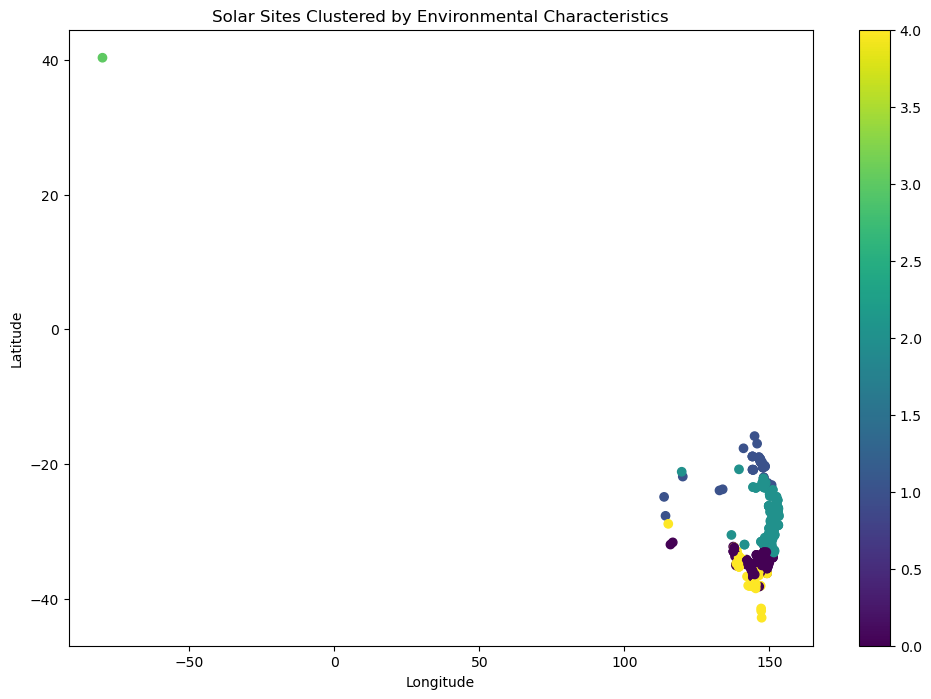

Feature importances for predicting temperature:
latitude: 0.7982800352628258
longitude: 0.038843901886412374
wind_speed: 0.027268523112460818
cloud_cover: 0.010750132857717842
humidity: 0.053340564832183836
avg_daily_irradiance: 0.07151684204839935
Model R^2 score: 0.9562242626512065


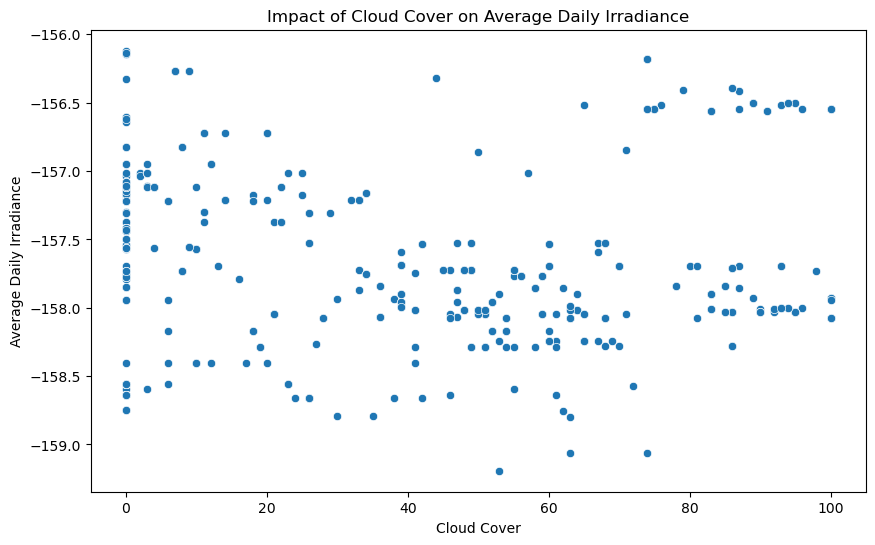

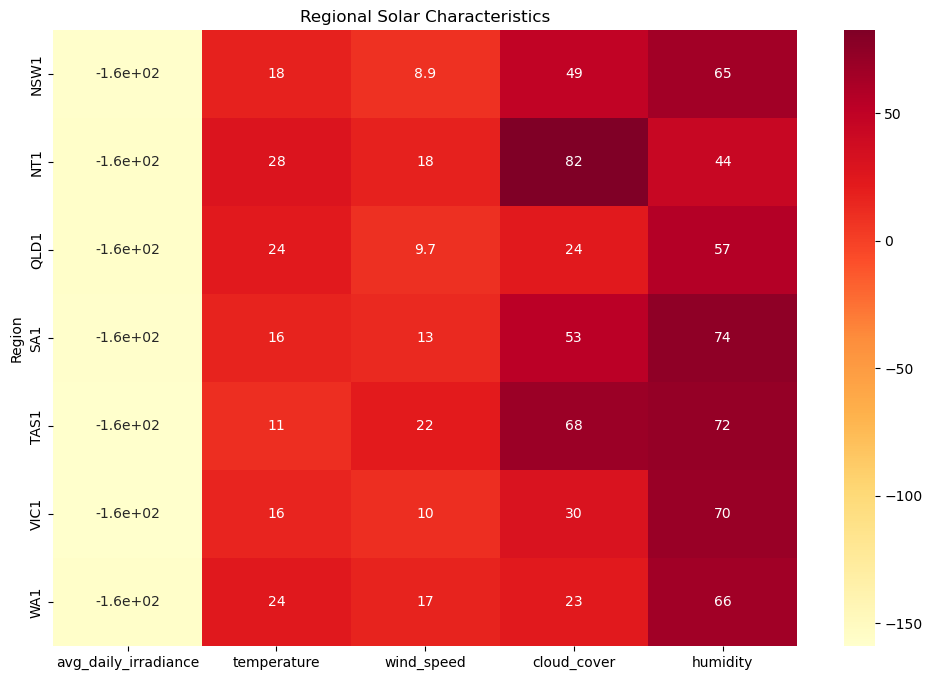

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('solar_sites_with_irradiance_data.csv')

# 1. Solar Potential Prediction
def predict_avg_irradiance():
    features = ['latitude', 'longitude', 'temperature', 'wind_speed', 'cloud_cover', 'humidity']
    X = data[features]
    y = data['avg_daily_irradiance']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    print("Feature importances for predicting average daily irradiance:")
    for feature, importance in zip(features, model.feature_importances_):
        print(f"{feature}: {importance}")
    
    print(f"Model R^2 score: {model.score(X_test, y_test)}")

# 2. Site Clustering
def cluster_sites():
    features = ['latitude', 'longitude', 'temperature', 'wind_speed', 'cloud_cover', 'humidity', 'avg_daily_irradiance']
    X = data[features]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    kmeans = KMeans(n_clusters=5, random_state=42)
    data['Cluster'] = kmeans.fit_predict(X_scaled)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(data['longitude'], data['latitude'], c=data['Cluster'], cmap='viridis')
    plt.colorbar(scatter)
    plt.title('Solar Sites Clustered by Environmental Characteristics')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# 3. Temperature Prediction
def predict_temperature():
    features = ['latitude', 'longitude', 'wind_speed', 'cloud_cover', 'humidity', 'avg_daily_irradiance']
    X = data[features]
    y = data['temperature']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    print("Feature importances for predicting temperature:")
    for feature, importance in zip(features, model.feature_importances_):
        print(f"{feature}: {importance}")
    
    print(f"Model R^2 score: {model.score(X_test, y_test)}")

# 4. Cloud Cover Impact Analysis
def analyze_cloud_cover_impact():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='cloud_cover', y='avg_daily_irradiance', data=data)
    plt.title('Impact of Cloud Cover on Average Daily Irradiance')
    plt.xlabel('Cloud Cover')
    plt.ylabel('Average Daily Irradiance')
    plt.show()

# 5. Regional Solar Characteristics
def analyze_regional_characteristics():
    regional_data = data.groupby('Region').agg({
        'avg_daily_irradiance': 'mean',
        'temperature': 'mean',
        'wind_speed': 'mean',
        'cloud_cover': 'mean',
        'humidity': 'mean'
    }).reset_index()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(regional_data.set_index('Region'), annot=True, cmap='YlOrRd')
    plt.title('Regional Solar Characteristics')
    plt.show()

if __name__ == "__main__":
    predict_avg_irradiance()
    cluster_sites()
    predict_temperature()
    analyze_cloud_cover_impact()
    analyze_regional_characteristics()

C:\Users\zerad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\zerad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\zerad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\zerad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

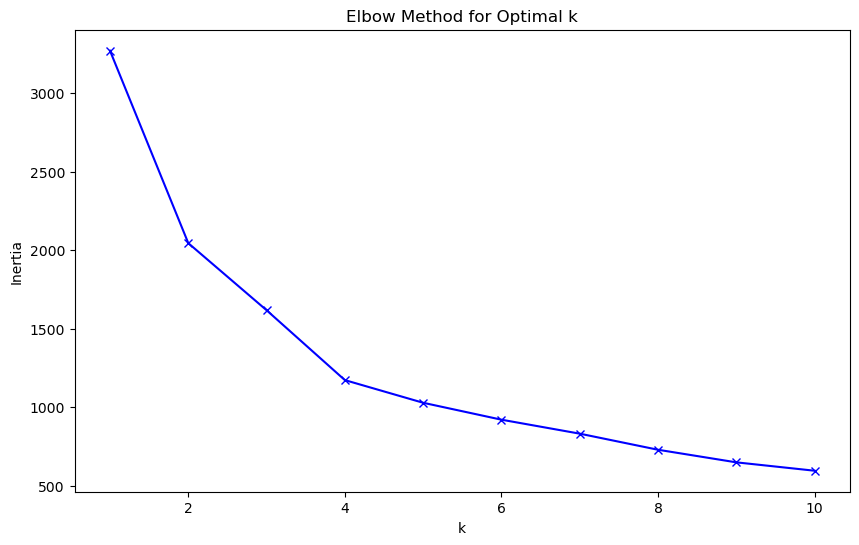

C:\Users\zerad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


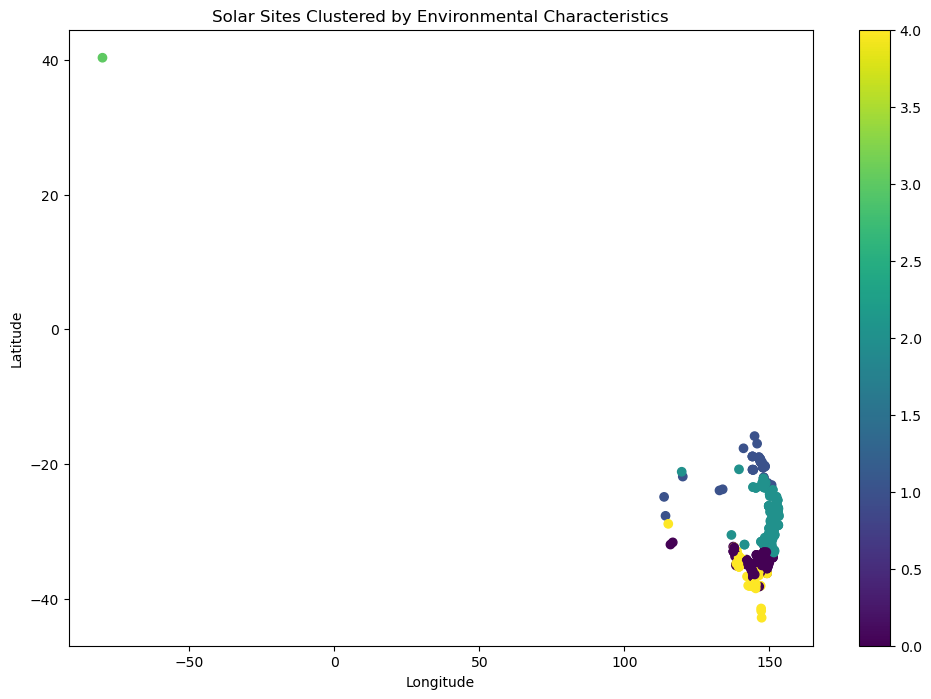

Cluster Characteristics:
          latitude   longitude  temperature  wind_speed  cloud_cover  \
Cluster                                                                
0       -34.490566  145.101135    16.557764    9.128571    63.484472   
1       -20.480371  144.348675    24.784000   15.550000    63.920000   
2       -27.572605  150.308525    23.151205    8.006024     7.644578   
3        40.335625  -79.960607    15.500000   15.100000    71.000000   
4       -36.217195  142.785025    15.249438   12.846067    29.719101   

          humidity  avg_daily_irradiance  
Cluster                                   
0        72.012422           -157.955452  
1        59.360000           -156.506284  
2        54.698795           -157.283432  
3        48.000000           -156.849355  
4        70.134831           -158.314676  


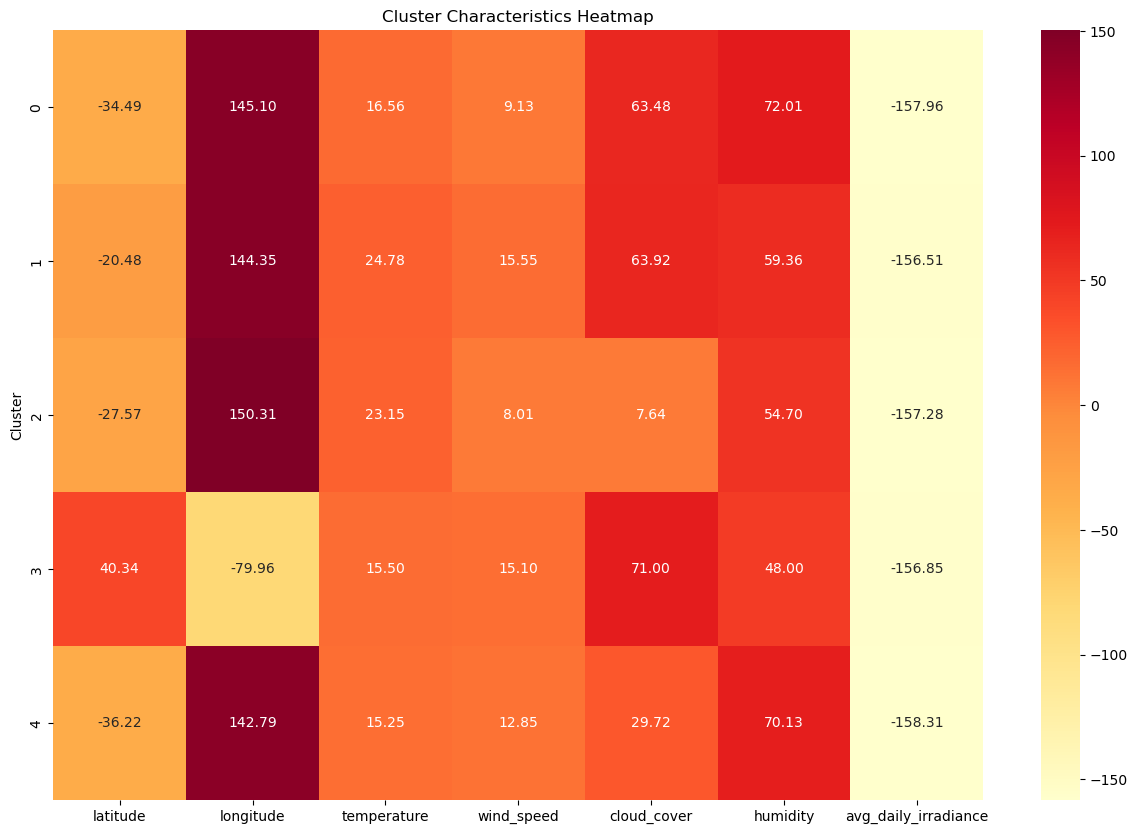

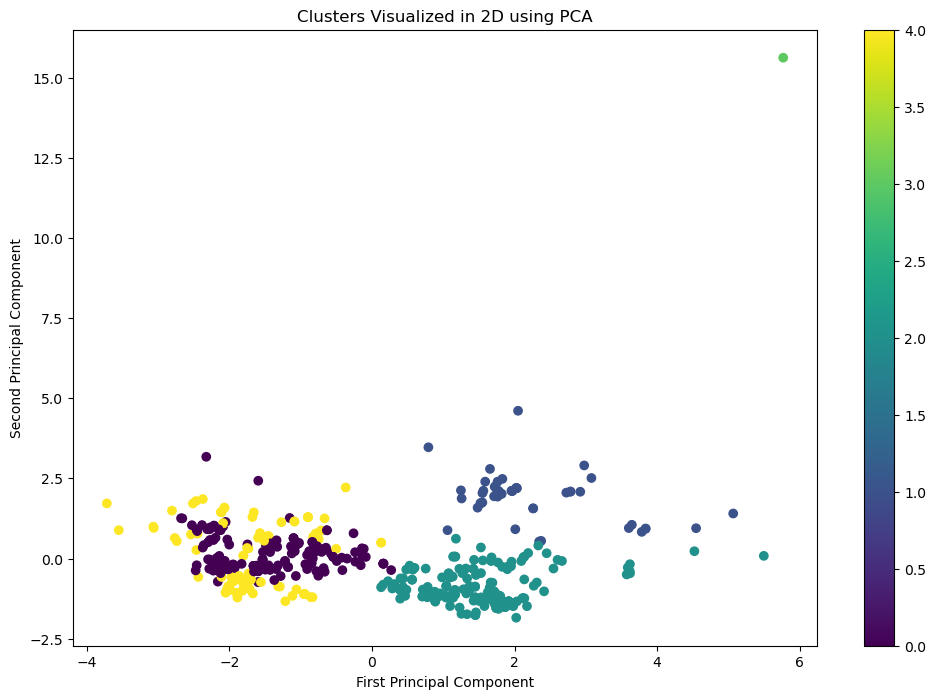

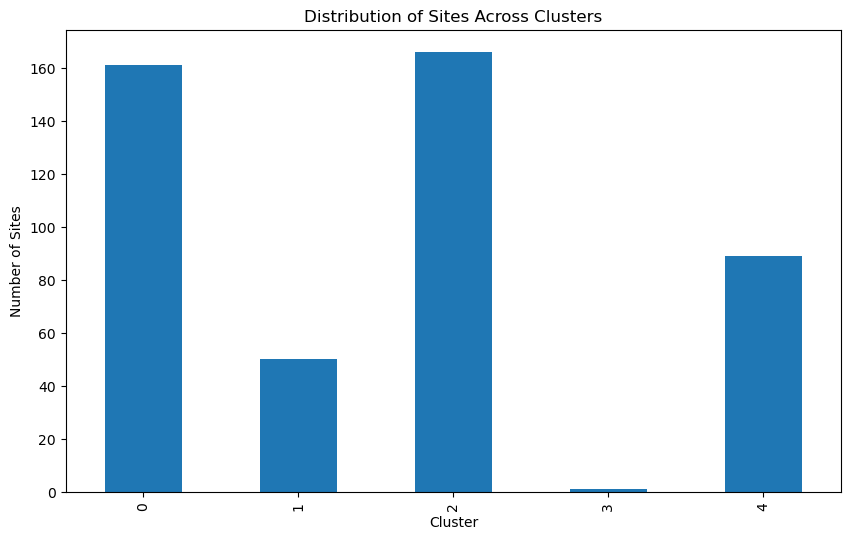


Cluster 0 Summary:
Number of sites: 161
Top 5 sites:
0                Adelaide Airport
1     Adelaide Desalination Plant
2       Adelaide Zoo Solar System
9              Avonlie Solar Farm
11                  Bakers Maison
Name: Site Name, dtype: object

Average characteristics:
latitude                -34.490566
longitude               145.101135
temperature              16.557764
wind_speed                9.128571
cloud_cover              63.484472
humidity                 72.012422
avg_daily_irradiance   -157.955452
dtype: float64


Cluster 1 Summary:
Number of sites: 50
Top 5 sites:
35              Boma Solar Farm
43        Broadsound Solar Farm
55    Burdekin Solar Farm - KCI
69             Clare Solar Farm
73              Collinsville PV
Name: Site Name, dtype: object

Average characteristics:
latitude                -20.480371
longitude               144.348675
temperature              24.784000
wind_speed               15.550000
cloud_cover              63.920000
humidity     

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv('solar_sites_with_irradiance_data.csv')

# Select features for clustering
features = ['latitude', 'longitude', 'temperature', 'wind_speed', 'cloud_cover', 'humidity', 'avg_daily_irradiance']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow curve, let's choose an appropriate number of clusters
n_clusters = 5  # You may adjust this based on the elbow curve

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters on a map
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['longitude'], data['latitude'], c=data['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.title('Solar Sites Clustered by Environmental Characteristics')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Analyze cluster characteristics
cluster_means = data.groupby('Cluster')[features].mean()
print("Cluster Characteristics:")
print(cluster_means)

# Visualize cluster characteristics
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_means, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Cluster Characteristics Heatmap')
plt.show()

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.title('Clusters Visualized in 2D using PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Analyze the distribution of sites across clusters
cluster_counts = data['Cluster'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.title('Distribution of Sites Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Sites')
plt.show()

# Print summary of each cluster
for cluster in range(n_clusters):
    print(f"\nCluster {cluster} Summary:")
    cluster_data = data[data['Cluster'] == cluster]
    print(f"Number of sites: {len(cluster_data)}")
    print("Top 5 sites:")
    print(cluster_data['Site Name'].head())
    print("\nAverage characteristics:")
    print(cluster_data[features].mean())
    print("\n" + "="*50)